In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import  warnings
warnings.filterwarnings(action='ignore')


In [101]:
df=pd.read_csv('Google_Stock_Price_Train.csv')
df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [102]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [103]:
df.shape

(1258, 6)

In [104]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

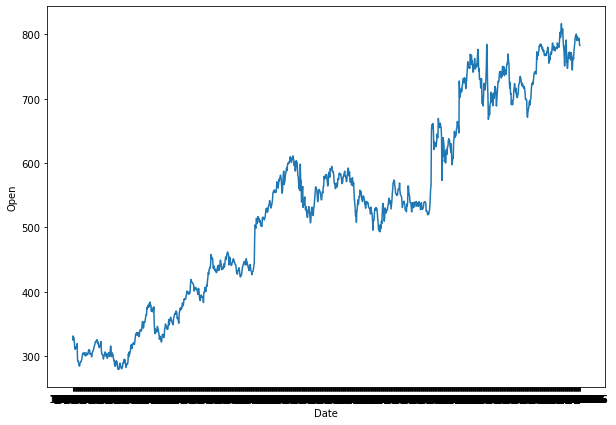

In [88]:
plt.figure(figsize=(10,7))
_=sns.lineplot(x='Date',y='Open',data=df)

In [105]:
training_set=df.iloc[:,1:2].values

In [106]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

# Feature Scaling

In [107]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
training_set_scaled=sc.fit_transform(training_set)

In [108]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

# Creating a Data Structure with 60 timestamp and 1 output

In [109]:
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [110]:
x_train.shape

(1198, 60)

In [111]:
print(x_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


# Reshape

In [112]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [113]:
x_train.shape

(1198, 60, 1)

# RNN Model Building

In [114]:
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

# Adding first layer 

In [115]:
rnn_reg=Sequential()

In [116]:
rnn_reg.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))  
#i/p dimension=i/p shape here

In [117]:
rnn_reg.add(Dropout(0.2))

# Adding Second Layer

In [118]:
rnn_reg.add(LSTM(units=50,return_sequences=True))
rnn_reg.add(Dropout(0.2))
# return_sequences=True means want to add one more layer

# Adding third layer

In [119]:
rnn_reg.add(LSTM(units=50,return_sequences=True))
rnn_reg.add(Dropout(0.2))

# Adding fourth layer

In [120]:
rnn_reg.add(LSTM(units=50))
rnn_reg.add(Dropout(0.2))

# Adding output layer

In [121]:
rnn_reg.add(Dense(units=1))

# MOdel compilation

In [122]:
# regression problem
rnn_reg.compile(optimizer='adam',loss='mse')

# Model Training

In [123]:
x_train.shape

(1198, 60, 1)

In [124]:
rnn_reg.fit(x_train,y_train,batch_size=32,epochs=50)

Epoch 1/50
38/38 [==============================] - 20s 131ms/step - loss: 0.0370
Epoch 2/50
38/38 [==============================] - 5s 135ms/step - loss: 0.0060
Epoch 3/50
38/38 [==============================] - 5s 135ms/step - loss: 0.0058
Epoch 4/50
38/38 [==============================] - 5s 138ms/step - loss: 0.0056
Epoch 5/50
38/38 [==============================] - 5s 139ms/step - loss: 0.0054
Epoch 6/50
38/38 [==============================] - 5s 136ms/step - loss: 0.0045
Epoch 7/50
38/38 [==============================] - 5s 137ms/step - loss: 0.0049
Epoch 8/50
38/38 [==============================] - 5s 136ms/step - loss: 0.0043
Epoch 9/50
38/38 [==============================] - 5s 135ms/step - loss: 0.0046
Epoch 10/50
38/38 [==============================] - 5s 138ms/step - loss: 0.0047
Epoch 11/50
38/38 [==============================] - 5s 138ms/step - loss: 0.0041
Epoch 12/50
38/38 [==============================] - 5s 137ms/step - loss: 0.0050
Epoch 13/50
38/38 [=====

# Reading Test Data

In [125]:
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [126]:
real_stock_price=dataset_test.iloc[:,1:2].values

In [127]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [128]:
dataset_total=pd.concat((df['Open'],dataset_test['Open']),axis=0)

In [129]:
dataset_total.shape

(1278,)

In [130]:
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [131]:
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1)) 
predicted_stock_price=rnn_reg.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 3s 3s/step


In [132]:
predicted_stock_price

array([[791.0943 ],
       [789.1868 ],
       [787.23206],
       [785.49194],
       [784.3509 ],
       [784.2627 ],
       [785.39185],
       [787.5233 ],
       [790.3279 ],
       [793.4297 ],
       [796.4717 ],
       [799.1504 ],
       [801.26746],
       [802.7951 ],
       [803.79535],
       [804.7387 ],
       [806.10596],
       [808.2825 ],
       [811.2127 ],
       [814.10535]], dtype=float32)

# Visualizing the test result

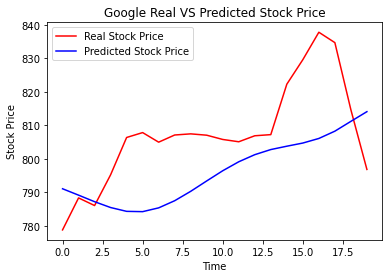

In [133]:
plt.plot(real_stock_price,color='red',label='Real Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Stock Price')
plt.title('Google Real VS Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()